In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway, mannwhitneyu
from IPython.display import Image, display

### Functions for visualization

In [2]:
def two_histagrams(x, y, name_x, name_y):
    sns.set_palette("pastel")
    x.hist(alpha = 0.5, weights = [1/len(x)]*len(x), color = 'red', label=name_x)
    y.hist(alpha = 0.5, weights = [1/len(y)]*len(y), color = 'green', label = name_y)
    plt.axvline(x.median(), color = 'red', ls='--', label = f"median {name_x}")
    plt.axvline(y.median(), color = 'green', ls='dashdot', label = f"median {name_y}")
    plt.xlabel('PRICE, UAH')
    plt.legend()
    plt.show()

In [3]:
def tree_histagrams(x, name_x, y, name_y, z, name_z):
    sns.set_palette("pastel")
    x.hist(alpha = 0.5, weights = [1/len(x)]*len(x), color = 'red', label=name_x)
    y.hist(alpha = 0.5, weights = [1/len(y)]*len(y), color = 'green', label = name_y)
    z.hist(alpha = 0.5, weights = [1/len(z)]*len(z), color = 'blue', label = name_z)
    plt.axvline(x.median(), color = 'red', ls='--', label = f"median {name_x}")
    plt.axvline(y.median(), color = 'green', ls='dashdot', label = f"median {name_y}")
    plt.axvline(z.median(), color = 'blue', ls='dashdot', label = f"median {name_z}")
    plt.xlabel('PRICE, UAH')
    plt.legend()
    plt.show()

In [4]:
def box_plot(values, names, title):
    sns.set_palette("pastel")
    fig = plt.figure(figsize =(10, 7))
    plt.title(title)
    plt.boxplot(values, patch_artist=True, labels=names)
    plt.ylabel('PRICE, UAH')
    plt.show()

### Function for statistical analysis

In [5]:
def anova(*args):
    result = f_oneway(*args)
    return result

In [6]:
def mann_wh(x, y):
    result = mannwhitneyu(x, y)
    return result

### Read data

In [7]:
data = pd.read_csv('after_preprocessing.csv')
data.head()

district  status  balcony  area_kitchen  area_living  area  room  floor  \
0       1.0     2.0      1.0          11.0         27.0  52.0     1      9   
1       1.0     1.0      2.0           6.0         42.0  58.0     3      5   
2       5.0     2.0      1.0          18.0         15.0  44.0     1      2   
3       5.0     2.0      1.0          15.0         39.0  48.0     1      8   
4       2.0     3.0      1.0          15.0         39.0  50.0     1      8   

   price  age  
0  12500    3  
1   8500    1  
2  19300    2  
3  15000    3  
4  30800    3

In [8]:
data.shape

(10971, 10)

### Explore the data

In [10]:
data.describe().round(2)

district    status   balcony  area_kitchen  area_living      area  \
count  10971.00  10971.00  10971.00      10971.00     10971.00  10971.00   
mean       3.46      2.28      0.43         15.11        36.70     62.02   
std        1.48      0.59      0.64          3.78        11.27     22.92   
min        1.00      1.00      0.00          3.00         6.00      7.00   
25%        2.00      2.00      0.00         15.00        27.00     45.00   
50%        3.00      2.00      0.00         15.00        39.00     57.00   
75%        5.00      3.00      1.00         16.00        42.00     72.00   
max        6.00      3.00      4.00         83.00       175.00    180.00   

           room     floor     price       age  
count  10971.00  10971.00  10971.00  10971.00  
mean       1.80      4.76  19446.01      2.67  
std        0.82      3.14   8265.95      0.65  
min        1.00      0.00   7000.00      1.00  
25%        1.00      2.00  14000.00      3.00  
50%        2.00      4.00  17550.00      3.00  
75%        2.00      7.00  23100.00      3.00  
max        7.00     30.00  90000.00      3.00

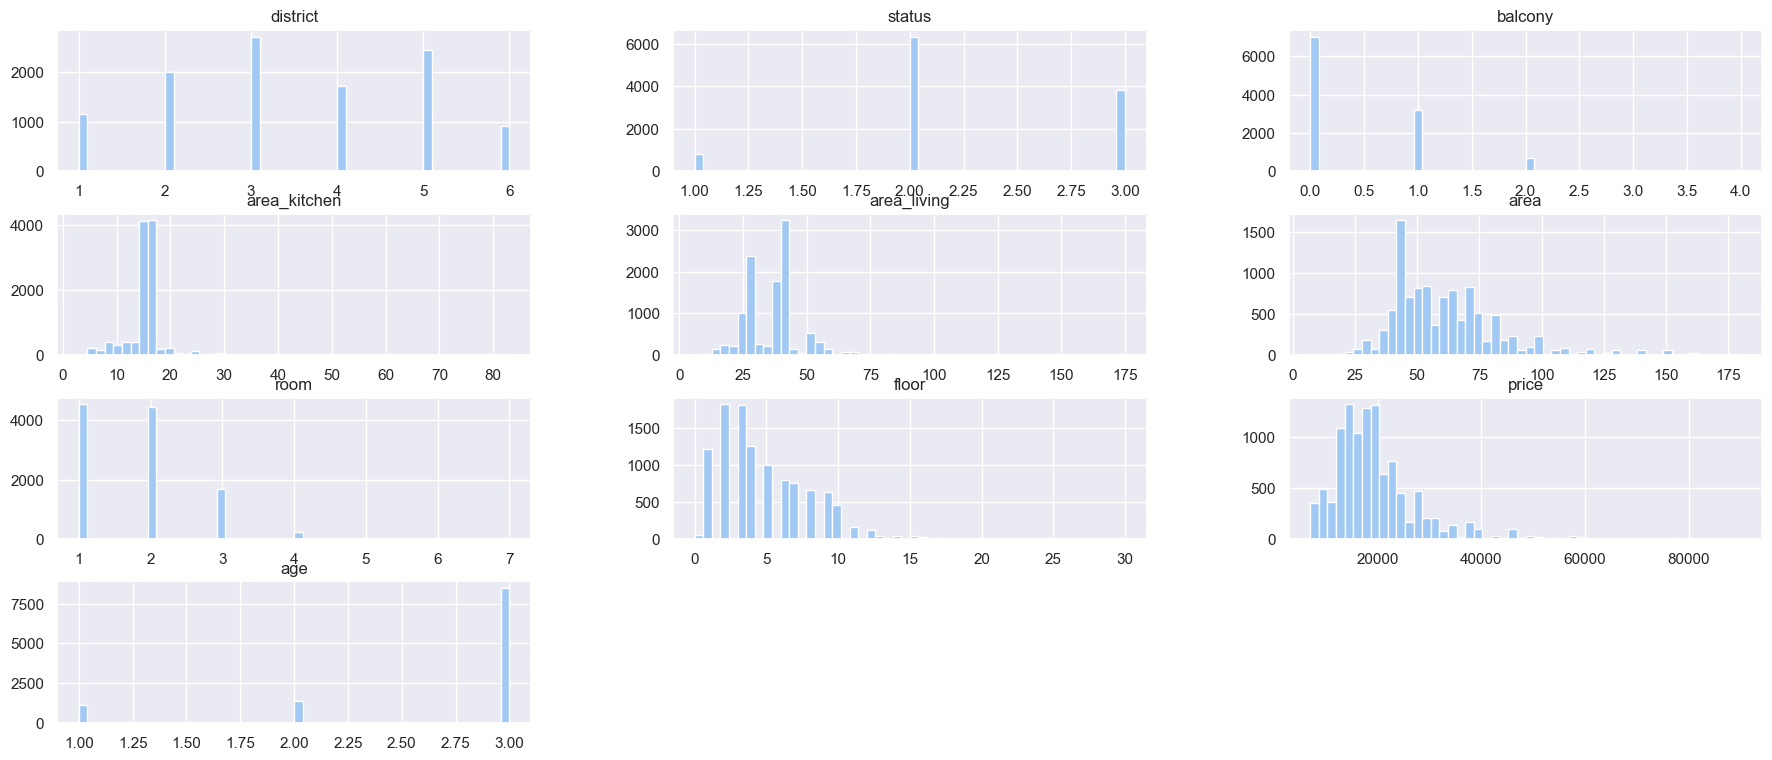

In [12]:
data.hist(bins = 50)
sns.set(rc={'figure.figsize':(22, 9)})
sns.set_palette("pastel")

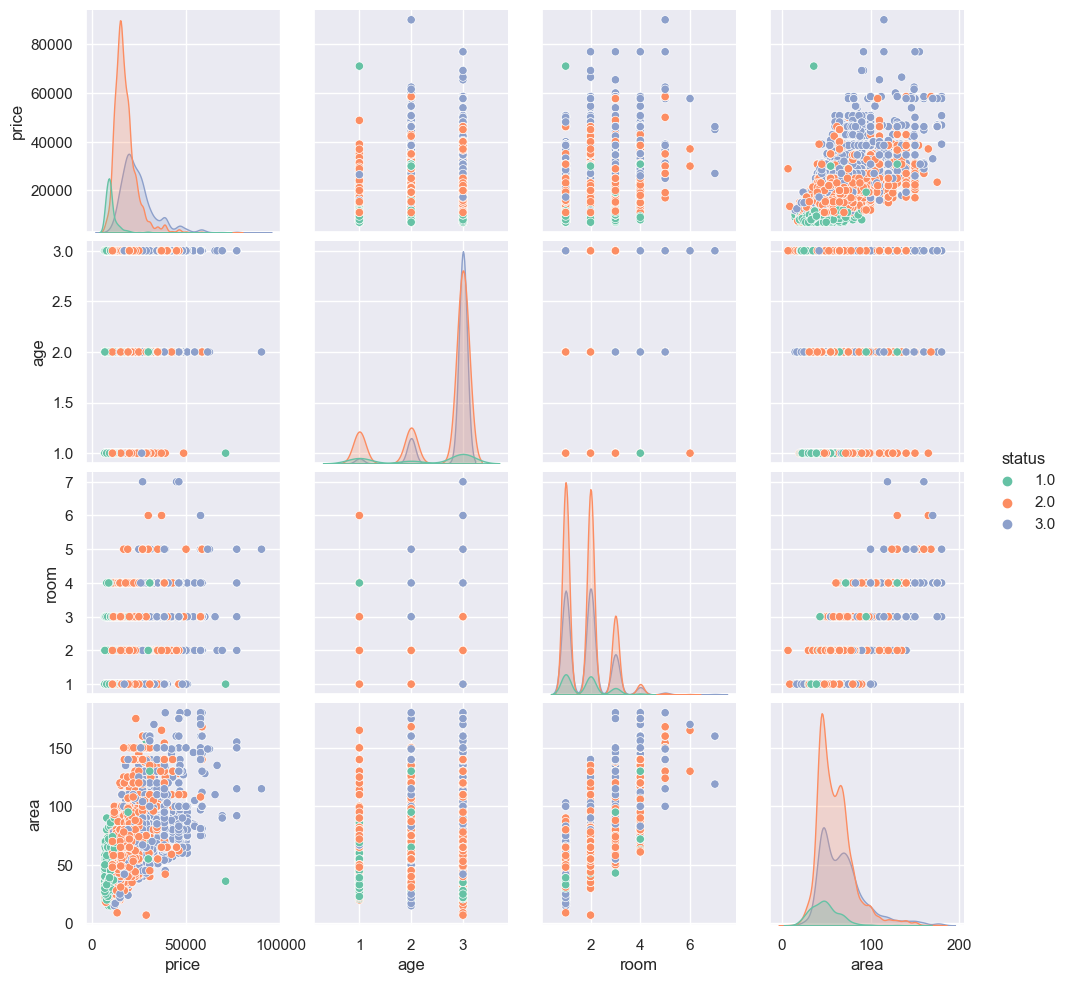

In [13]:
sns.pairplot(data[['price', 'age', 'room', 'area', 'status']], hue="status", palette='Set2')
plt.show()

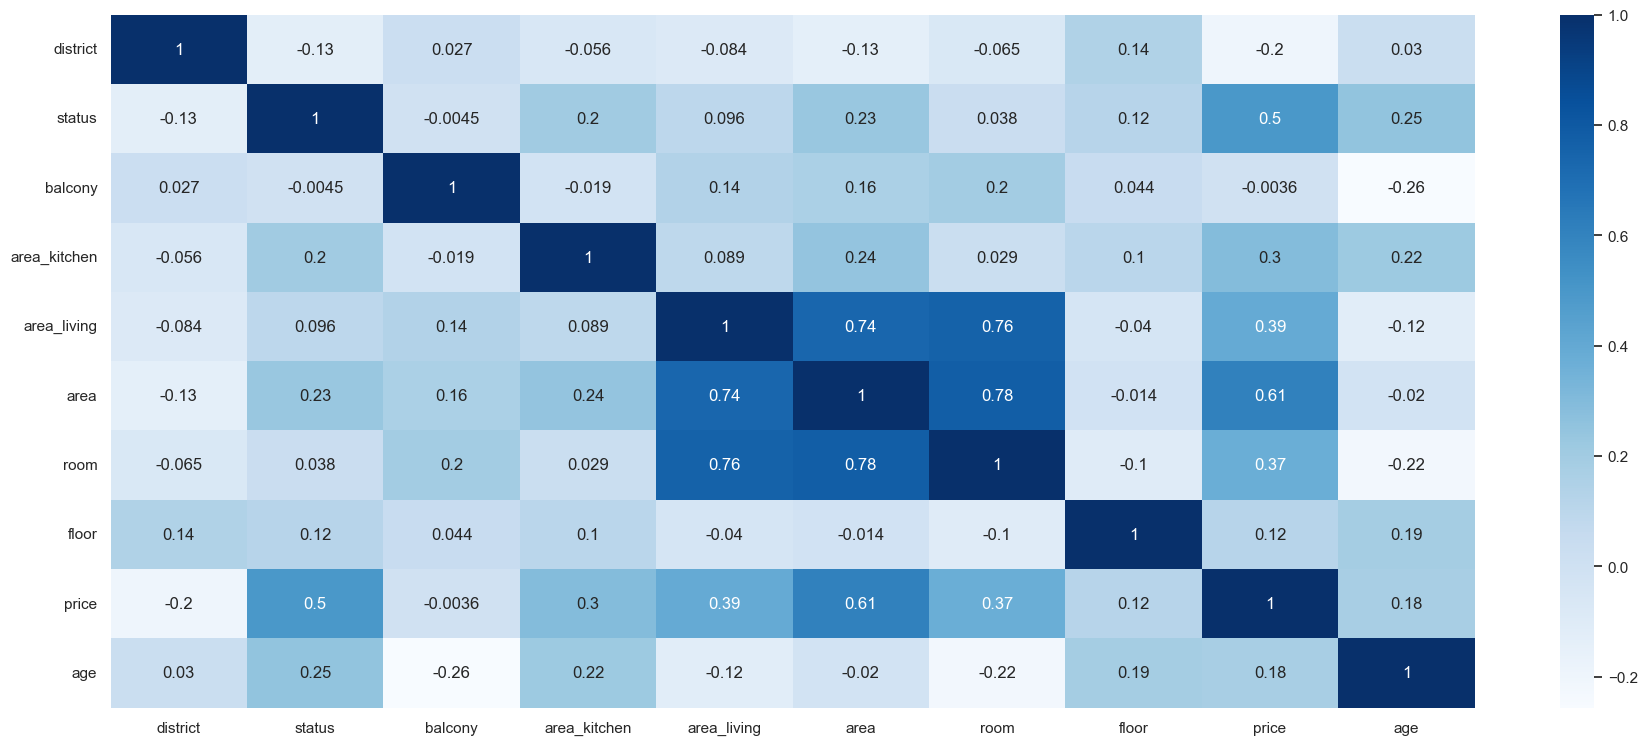

In [14]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")
sns.set(rc={'figure.figsize':(15, 8)})

_____

- Is there a significant difference in price depending on the age of the house? 
    - Soviet time building --> 1
    - House of the city of the old Lviv --> 2
    - New building --> 3

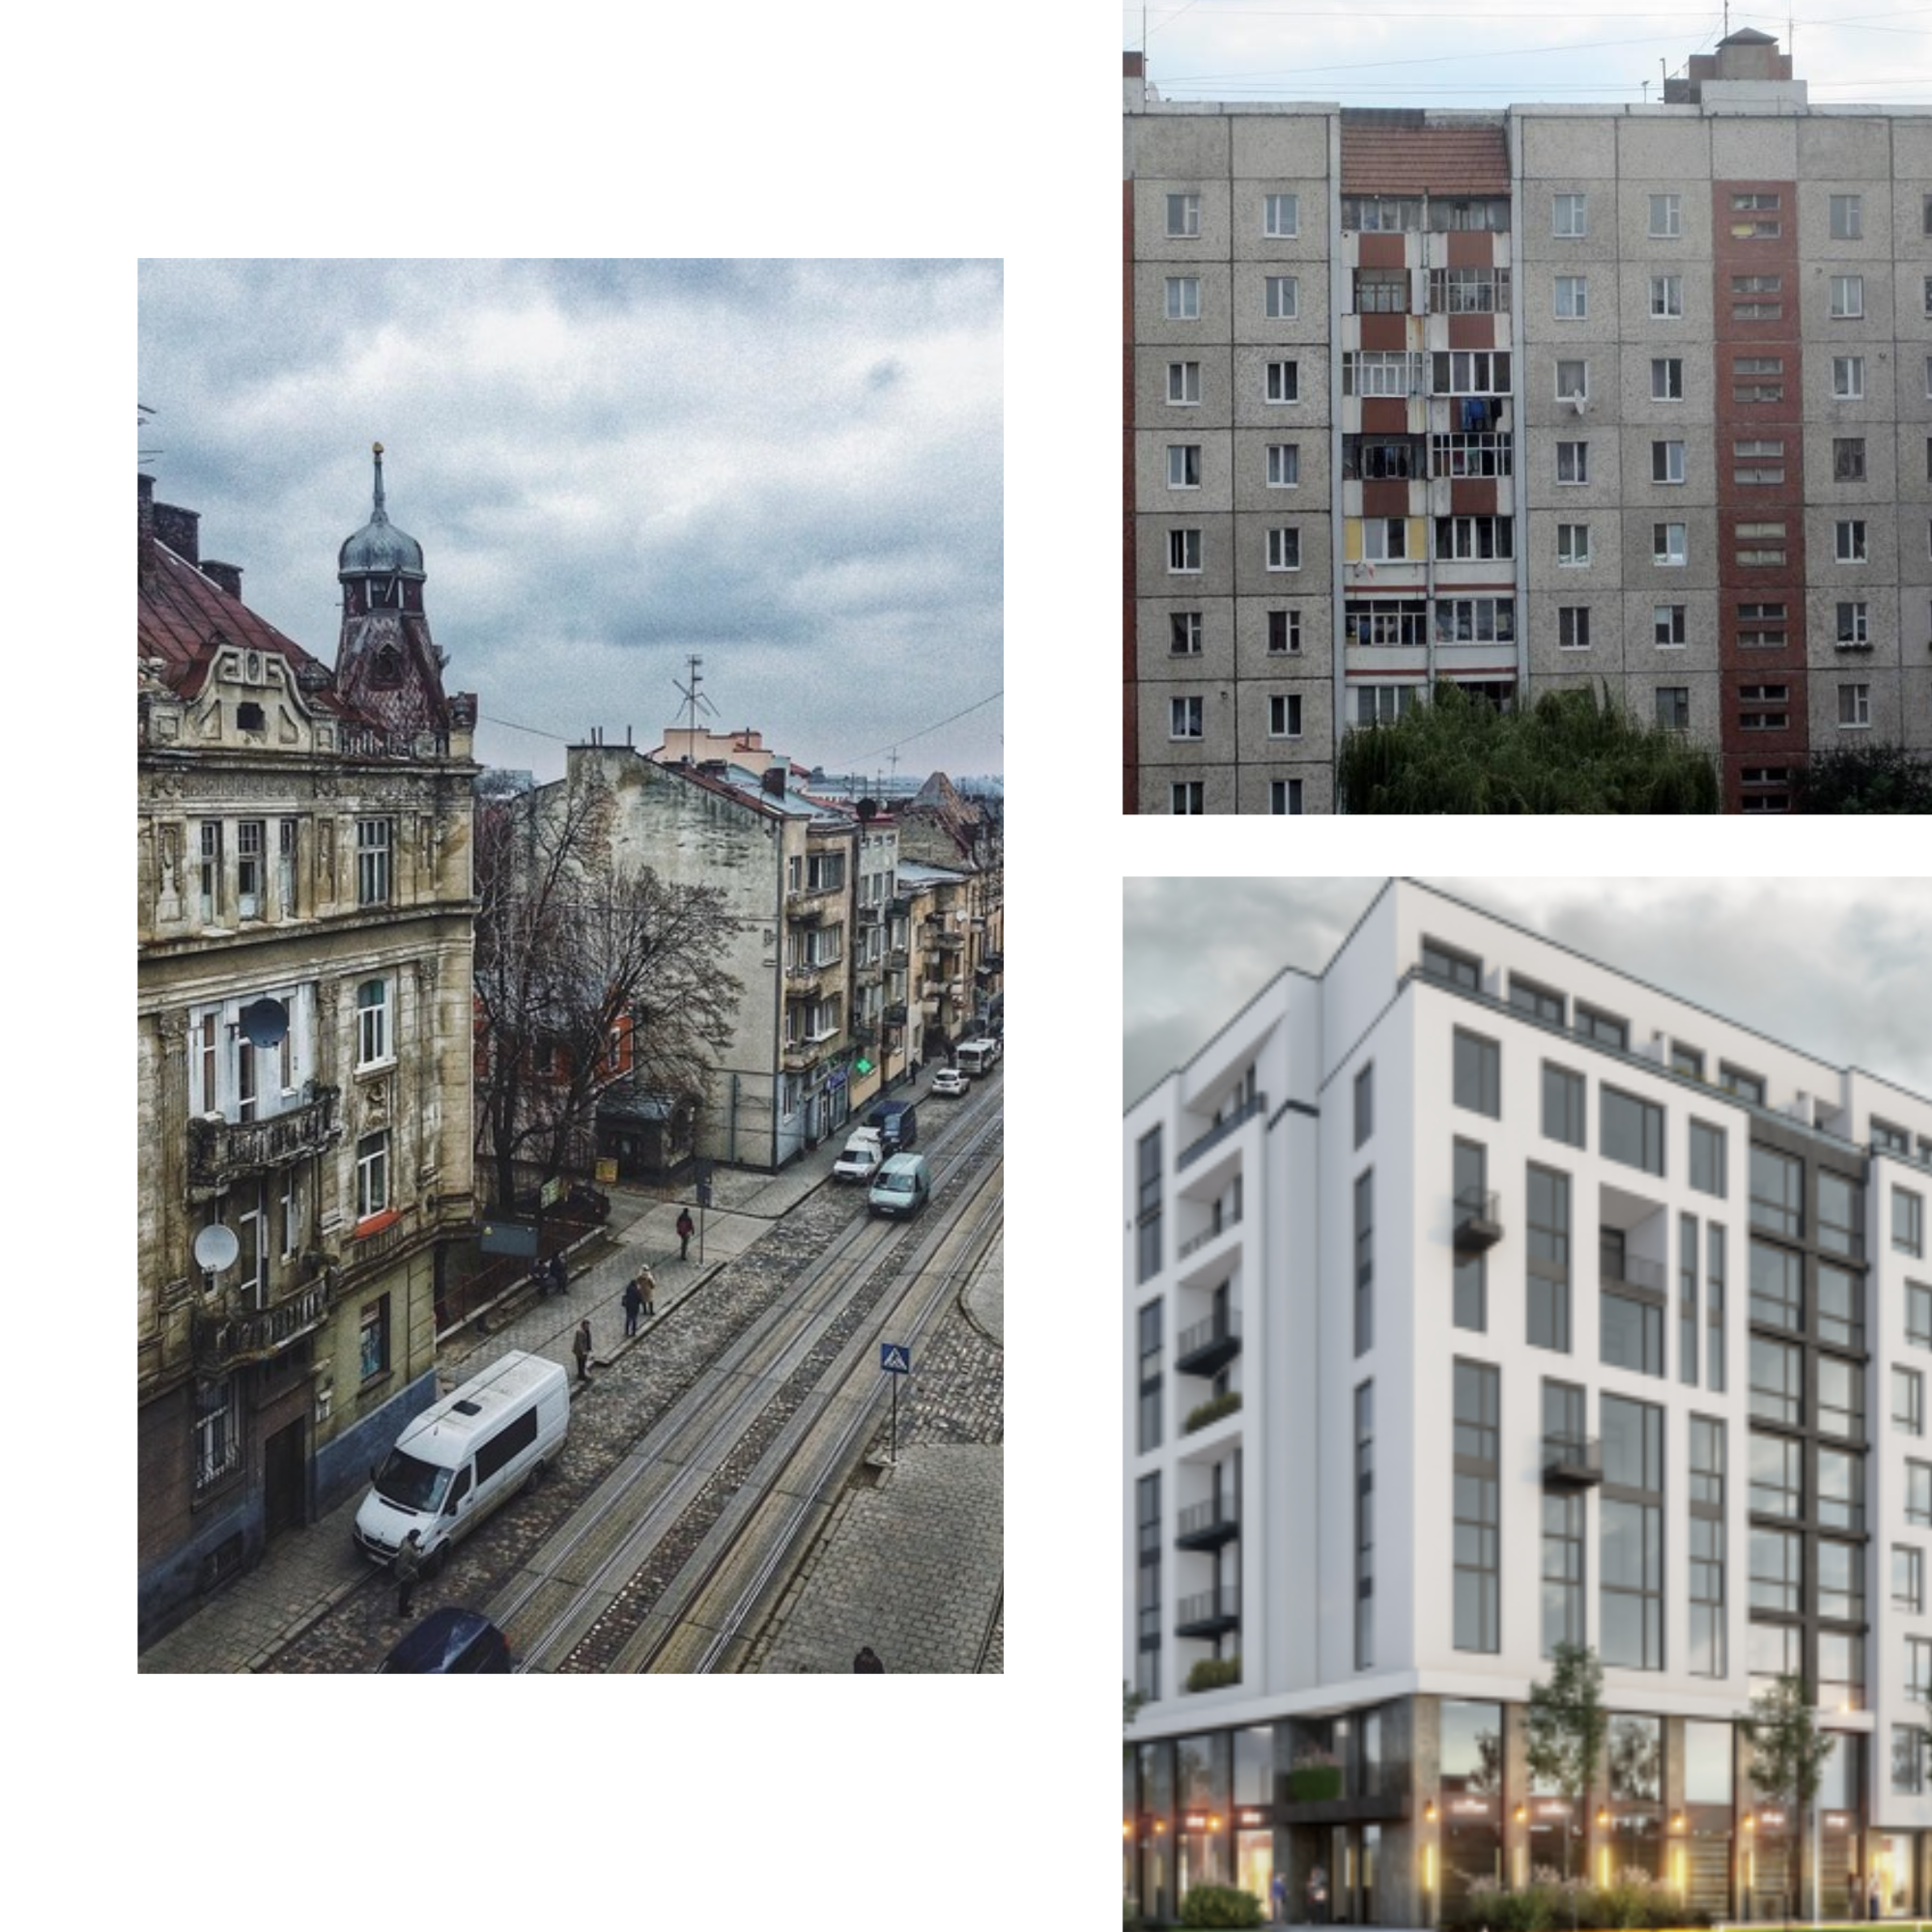

In [15]:
image1 = 'type_byild.png'
display(Image(filename=image1, width=500, height=500))

- $H_0$ - the price of renting an apartment does not depend on the age of the house
- $H_1$ - the price of renting an apartment depend on the age of the house

In [16]:
new = data[data['age'] == 3]['price']
hist = data[data['age'] == 2]['price']
old = data[data['age'] == 1]['price']

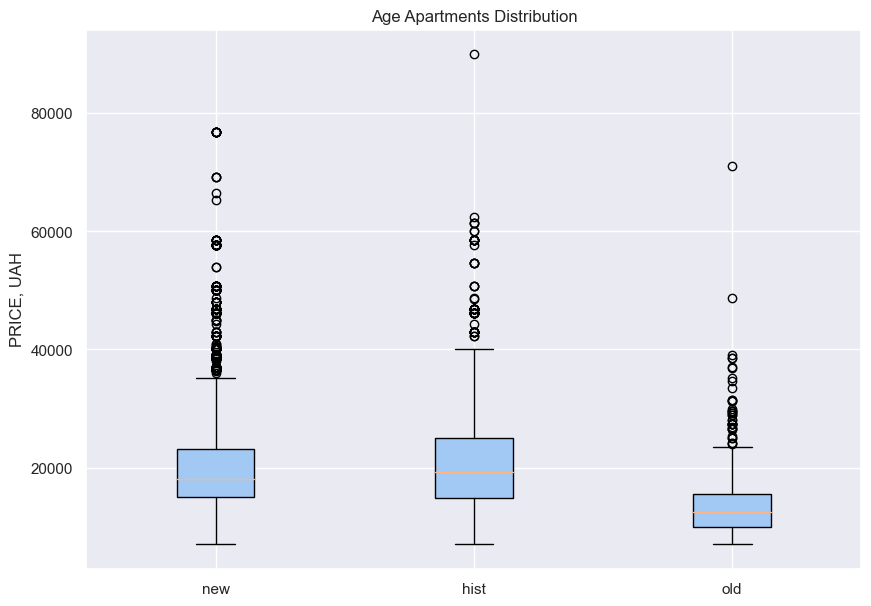

In [17]:
box_plot([new, hist, old], ['new', 'hist', 'old'], "Age Apartments Distribution")

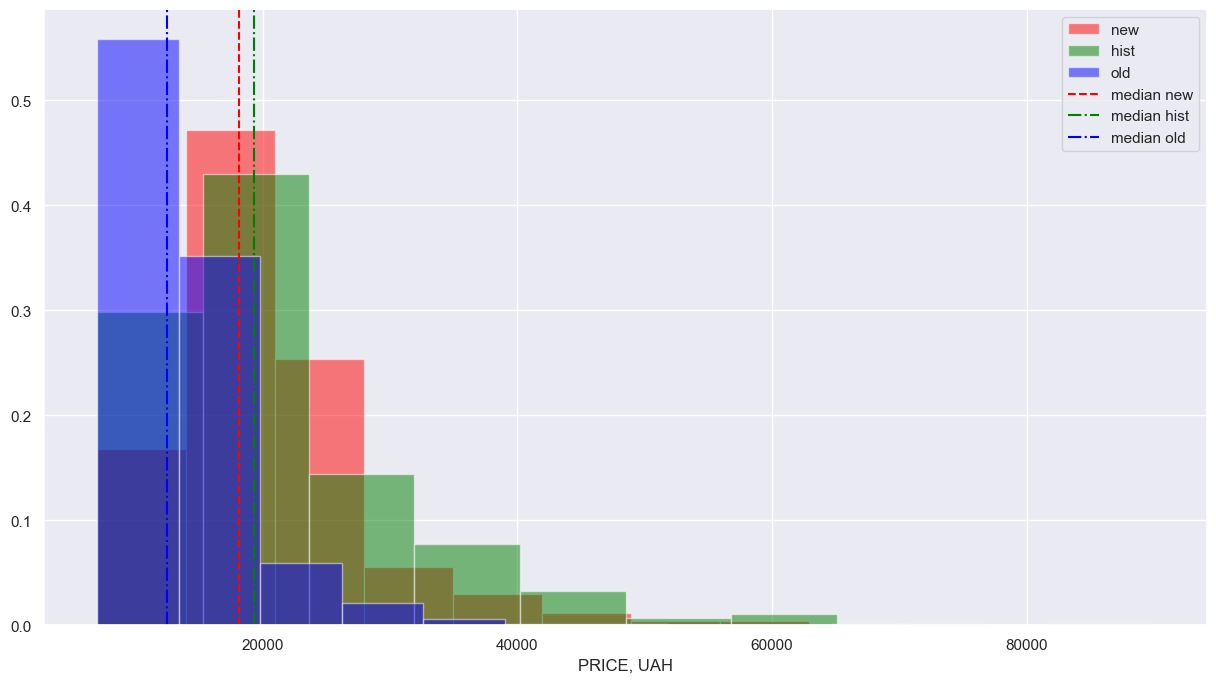

In [18]:
tree_histagrams(new, 'new', hist, 'hist', old, 'old')

- according to the graphs, we can assume that the rental price of old buildings is quite different from historical and new buildings
- to confirm the observations, we will conduct an ANOVA test
- on the box plot graphs we can see the difference between new buildings and historical houses - historical houses have a larger quartile range, also on the histograms a large right tail is visible

In [19]:
print(anova(new, old, hist))

F_onewayResult(statistic=334.11299435402, pvalue=1.3966119948872172e-141)


- F-statistic is 334.11. This means that there is a significant difference between the mean values of the compared groups
- p-value is 1.39e-141 (or approximately 0). Thus, we can reject the null hypothesis and conclude that there is a significant difference between the means of the compared groups
- the age of the house affects the price of renting an apartment

____

- Is there a significant price difference depending on the floor?
     - The apartment is located up to the 5th floor (inclusive)
     - The apartment is located on the 6th floor (inclusive)

- $H_0$ - the price of renting an apartment does not depend on the floor
- $H_1$ - the price of renting an apartment depend on the floor

In [20]:
lower_floors = data[data['floor'] <= 5]['price']
high_rise = data[data['floor'] > 5]['price']

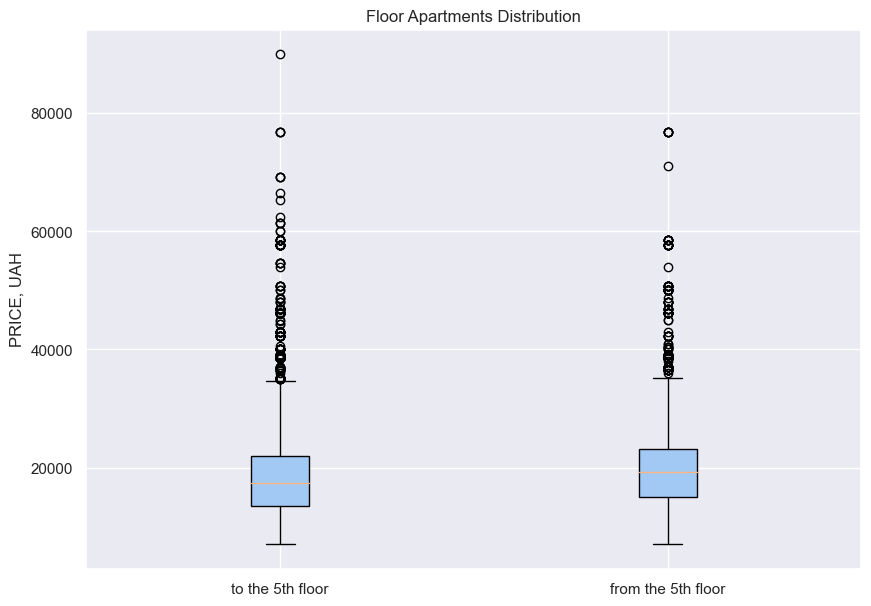

In [21]:
box_plot([lower_floors, high_rise], ['to the 5th floor', 'from the 5th floor'], "Floor Apartments Distribution")

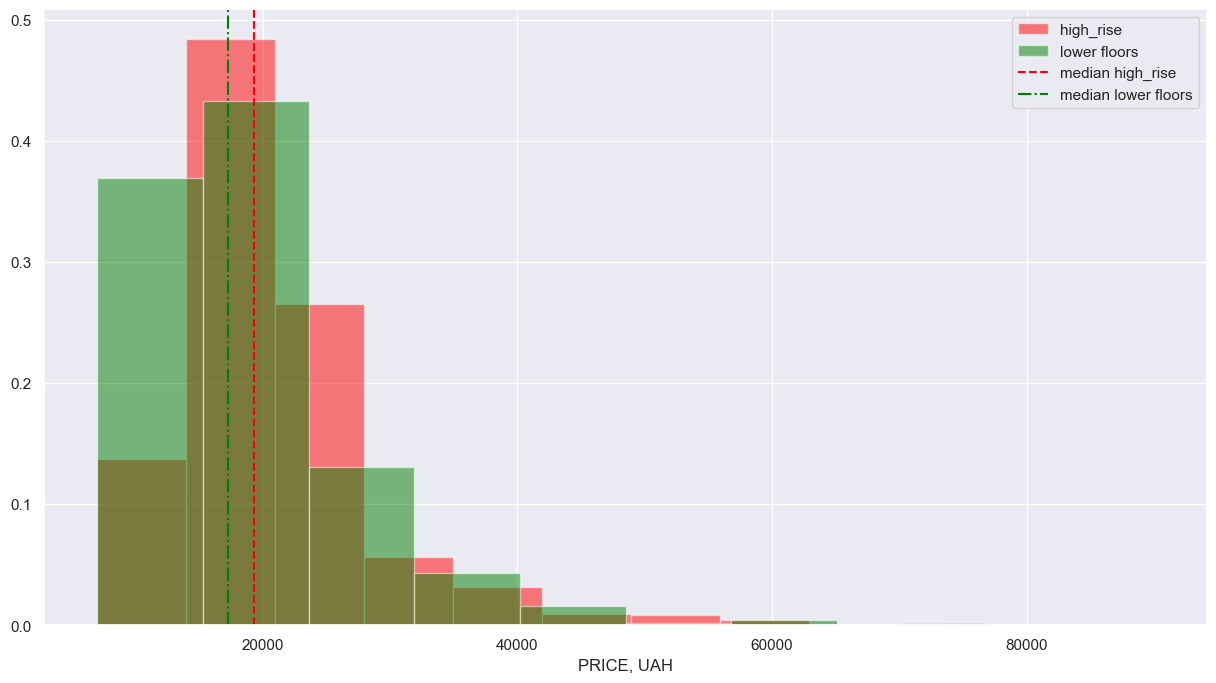

In [22]:
two_histagrams(high_rise, lower_floors, 'high_rise',  'lower floors')

In [23]:
print(mann_wh(high_rise, lower_floors))

MannwhitneyuResult(statistic=15562736.5, pvalue=2.0023073842704095e-35)


- according to the graphs, it is not quite noticeable that the interquartile ranges differ, as do the median values, there are also a large number of outliers both for apartments located up to and including the 5th floor, and from the 5th floor
- U statistic is equal to 15635082.5. This means that there is a significant difference between the two groups being compared
- p value is 2.002e-35. This is a very small p-value, we do not have enough evidence to accept the *0 hypothesis*, so we *accept the 1 hypothesis* and conclude that the location of an apartment on a certain floor affects the cost of renting an apartment.

_____

- Is there a significant difference in the price of renting an apartment depending on the area of the city?
     - Lychakiv district: 1,
     - Halytsky district: 2,
     - Shevchenkivskyi district: 3,
     - Sykhiv district: 4,
     - Frankivskyi district: 5,
     - Railway district: 6

- $H_0$ - the price of renting an apartment does not depend on the district of the city
- $H_1$ - the price of renting an apartment depends on the area of the city

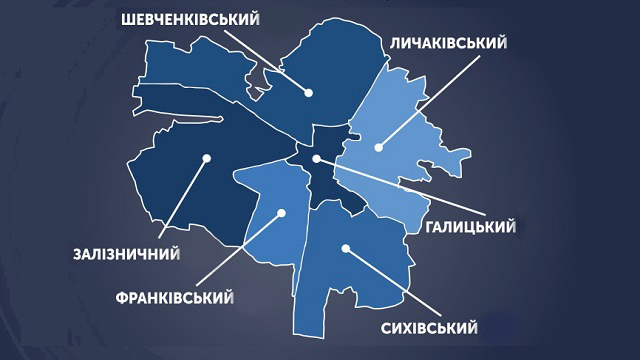

In [24]:
image2 = 'lviv.jpg'
display(Image(filename=image2, width=500, height=500))

In [25]:
lychakivskyi = data[data.district == 1]['price']
halytskyi =  data[data.district == 2]['price']
shevchenkivskyi = data[data.district == 3]['price']
sykhivskyi = data[data.district == 4]['price']
frankivskyi = data[data.district == 5]['price']
zaliznychnyi = data[data.district == 6]['price']

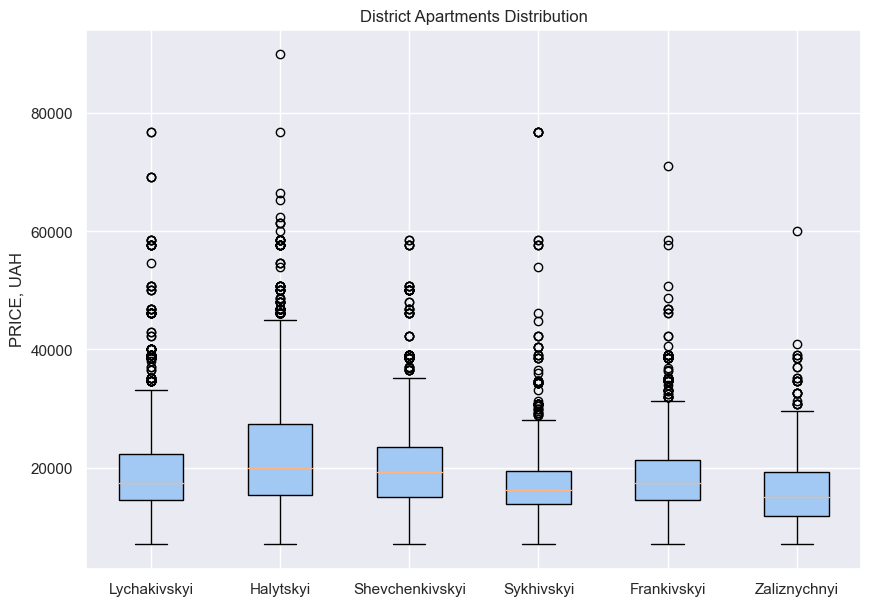

In [27]:
box_plot([ lychakivskyi, halytskyi, shevchenkivskyi, sykhivskyi, frankivskyi, zaliznychnyi], 
         ['Lychakivskyi', 'Halytskyi', 'Shevchenkivskyi', 'Sykhivskyi', 'Frankivskyi', 'Zaliznychnyi'], 
         "District Apartments Distribution")

In [29]:
print(anova(lychakivskyi, halytskyi, shevchenkivskyi, sykhivskyi, frankivskyi, zaliznychnyi))

F_onewayResult(statistic=153.1785349297114, pvalue=8.644914359125606e-158)


- according to the obtained statistics and p value, we can reject the null hypothesis and conclude that there is a significant difference between the average values of the compared groups
- we do not have enough evidence to accept the 0 hypothesis, so we accept the 1 hypothesis and conclude that the rental price in this sample is affected by the district

____

- Is there a significant difference in price depending on the repair/design of the apartment?
     - light : 1,
     - good : 2,
     - brilliant : 3

- $H_0$ - the price of renting an apartment does not depend on the status of the apartment
- $H_1$ - the price of renting an apartment depends on the status

In [28]:
light =  data[data.status == 1]['price']
good = data[data.status == 2]['price']
brilliant = data[data.status == 3]['price']

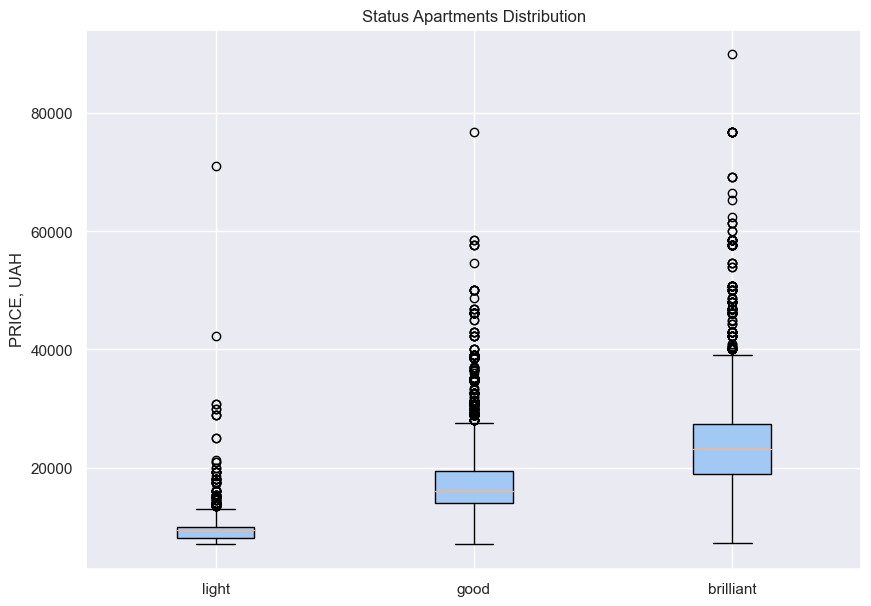

In [29]:
box_plot([light, good, brilliant], ['light', 'good', 'brilliant'], "Status Apartments Distribution")

- with the help of the graph, we can see a clear boundary of dividing the price according to the status of the apartment
- we can note that apartments with the *"good"* outliers values border on the status of *"brilliant"* and it is possible that this factor will create obstacles in the construction of the model